# Imports and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_data = pd.read_csv('../data/train.csv')
train_data.head()

# Summary
train_data.describe()


C:\Users\juanf\Desktop\Portfolio\financial-performance\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\juanf\Desktop\Portfolio\financial-performance\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Id,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,forwardPE,floatShares,...,Q10_TOTAL_STOCKHOLDERS_EQUITY,Q10_NET_INCOME,Q10_GROSS_PROFIT,Q10_COST_OF_REVENUES,Q10_REVENUES,Q10_OPERATING_INCOME,Q10_OPERATING_EXPENSES,Q10_EBITDA,Q10_DEPRECIATION_AND_AMORTIZATION,Q10_fiscal_year_end
count,1624.000000,1544.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,722.000000,1436.000000,1.598000e+03,...,1.449000e+03,1.305000e+03,1.423000e+03,1.321000e+03,1.325000e+03,1.427000e+03,1.430000e+03,1.421000e+03,1.419000e+03,1624.000000
mean,1012.267857,9345.583549,5.564103,5.654288,5.797524,5.582670,5.733864,inf,inf,2.260694e+08,...,2.165070e+09,7.483623e+07,4.547676e+08,8.925653e+08,1.355588e+09,1.195989e+08,3.839765e+08,6.886442e+07,-5.136951e+07,0.004926
std,585.242103,34273.510554,2.850260,2.857969,2.839455,2.769783,2.879112,NaN,NaN,3.579918e+09,...,8.504373e+09,5.173134e+08,2.242473e+09,4.225508e+09,5.776379e+09,6.788749e+08,1.677897e+09,1.775192e+09,1.728854e+09,0.070035
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000086,-2085.000000,1.034690e+05,...,-1.805800e+10,-3.944000e+09,-2.170800e+10,-1.880579e+09,-4.500000e+06,-4.475000e+09,-1.439000e+06,-5.090500e+10,-5.418200e+10,0.000000
25%,511.750000,141.000000,3.000000,3.000000,3.000000,3.000000,3.000000,12.575714,-2.843448,1.500746e+07,...,2.206300e+07,-1.088800e+07,1.615874e+06,1.202000e+06,9.223996e+06,-7.866176e+06,7.696162e+06,-1.061200e+07,0.000000e+00,0.000000
50%,1009.500000,878.000000,6.000000,6.000000,6.000000,6.000000,6.000000,21.599812,9.378077,4.103422e+07,...,2.365370e+08,-2.036240e+05,3.437100e+07,2.986900e+07,1.050790e+08,-5.481500e+04,3.821400e+07,-2.862240e+05,0.000000e+00,0.000000
75%,1519.250000,5040.750000,8.000000,8.000000,8.000000,8.000000,8.000000,37.157093,19.998548,1.062949e+08,...,9.976180e+08,2.411300e+07,2.109785e+08,3.116390e+08,6.035310e+08,4.251150e+07,1.740402e+08,3.760000e+07,0.000000e+00,0.000000
max,2029.000000,500000.000000,10.000000,10.000000,10.000000,10.000000,10.000000,inf,inf,1.421357e+11,...,1.622829e+11,9.497000e+09,2.957200e+10,6.617700e+10,9.240000e+10,1.137800e+10,2.919700e+10,2.656800e+10,2.551400e+10,1.000000


In [2]:
# As seen above, there are multiple NaN values in the dataset
# Lest handle it with a function to describe them
def missing_values_df(df):
    """Describe the missing values in a DataFrame

    Args:
        - df (pandas.DataFrame): The original df of interest

    Returns:
        - missing_data (pandas.DataFrame): A new df containing the
        description about missing values in the df given.
    """
    # Total missing values per column
    missing_values = df.isnull().sum()

    # Percentage of missing values per column
    missing_percentage = (missing_values / len(df)) * 100

    # New df with column name, total missing values, and percentage
    missing_data = pd.DataFrame({
        'Column Name': df.columns,
        'Total NaN': missing_values,
        'Percentage': missing_percentage
    }).reset_index(drop=True)

    # Sort by Percentage in descending order
    missing_data = missing_data.sort_values(by='Percentage', ascending=False)
    return missing_data.reset_index(drop=True)


In [3]:
# Describe the NaN values
missing_data = missing_values_df(train_data)
missing_data.head(10)

,Column Name,Total NaN,Percentage
0,trailingPE,902,55.541872
1,boardRisk,493,30.357143
2,auditRisk,493,30.357143
3,compensationRisk,493,30.357143
4,shareHolderRightsRisk,493,30.357143
5,overallRisk,493,30.357143
6,Q7_NET_INCOME,407,25.061576
7,Q10_NET_INCOME,319,19.642857
8,targetMeanPrice,307,18.903941
9,targetLowPrice,307,18.903941


# Fill NaN values

In [4]:
def fill_by_mean(df, group_col, target_col):
    """Fills NaN values in the target column by the mean of the group specified by group_col.

    Args:
        - df (pd.DataFrame): The dataframe containing the data.
        - group_col (str): The column name by which to group the data.
        - target_col (str): The target column to apply the mean fill for NaN values.

    Returns:
        - pd.DataFrame: The dataframe with NaN values filled in the target column by group mean.
    """
    df[target_col] = df.groupby(group_col)[target_col].transform(lambda x: x.fillna(x.mean()))
    return df


In [5]:
# First the column that have ratios 'trailingPE', 'forwardPE'
# Fill the NaN values with the mean per 'sector'
train_data = fill_by_mean(train_data, 'sector', 'trailingPE')
train_data = fill_by_mean(train_data, 'sector', 'forwardPE')
train_data = fill_by_mean(train_data, 'sector', 'targetHighPrice')
train_data = fill_by_mean(train_data, 'sector', 'targetMedianPrice')
train_data = fill_by_mean(train_data, 'sector', 'targetMeanPrice')
train_data = fill_by_mean(train_data, 'sector', 'targetLowPrice')
train_data = fill_by_mean(train_data, 'sector', 'totalRevenue')

In [6]:
# Assert that all the risk column are in the range [1 - 10]
def assert_range(df, risk_columns):
    """Asserts that the values in the risk columns are within the range of 1 to 10, 
    excluding NaN and inf values.

    Args:
        - df (pd.DataFrame): Dataframe containing the risk columns.
        - risk_columns (list): List of column names corresponding to the risk columns.

    Returns:
        - dict: A dictionary containing any columns with invalid values.
    """
    invalid_values = {}

    for col in risk_columns:
        # Select values that are not NaN or inf, and are outside the range 1 to 10
        invalid = df[col][~df[col].isin([np.nan, np.inf, -np.inf]) & 
        ((df[col] < 1) | (df[col] > 10))]
        
        if not invalid.empty:
            invalid_values[col] = invalid.values

    if not invalid_values:
        print("All values in risk columns are within the valid range (1-10).")
    else:
        print("The following columns contain values outside the range 1-10:")
        for col, values in invalid_values.items():
            print(f"Column '{col}' has invalid values: {values}")
    
    return invalid_values


In [7]:
# Apply the function to assert range of risk columns
risk_columns = [
    'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk'
]
invalid_values = assert_range(train_data, risk_columns)
del invalid_values

All values in risk columns are within the valid range (1-10).


In [8]:
def fill_risk_columns(df, column):
    """Fill the NaN values with the median according to its sector and industry.

    Args:
        - df (pandas.DataFrame): The dataframe containing the columns of interest.
        - column (list): A list with the column names where NaNs will be filled.

    Returns:
        - df (pandas.DataFrame): With the NaN values replaced.
    """
    for col in column:
        median_value = df.groupby(['sector', 'industry'])[col].transform('median')
        df[col] = df[col].fillna(median_value)
        
    return df


In [9]:
# Fill NaN values in risk columns
train_data = fill_risk_columns(train_data, risk_columns)


In [10]:
def fill_quarter_columns(df, quarter_columns):
    """Fills NaN values in the quarter columns:
    1. Fills NaN values backward from future quarters to past quarters.
    2. Fills NaN values forward from past quarters to future quarters.
    3. Fills NaN values in the first quarter with the column mean.

    Args:
        - df (pd.DataFrame): The dataframe containing the quarter columns.
        - quarter_columns (list): A list of quarter column names ordered from 
        Q10 (furthest) to Q1 (most recent).

    Returns:
        - pd.DataFrame: The dataframe with NaN values handled in the quarter columns.
    """
    # Fill NaN values backward from future quarters to past quarters
    df[quarter_columns] = df[quarter_columns].bfill(axis=1)
    # Fill NaN values forward from past quarters to future quarters
    df[quarter_columns] = df[quarter_columns].ffill(axis=1)
    
    # Fill NaN values in the first quarter (Q1) using the mean
    first_quarter_column = quarter_columns[-1]
    mean_value = df[first_quarter_column].mean()
    df[first_quarter_column] = df[first_quarter_column].fillna(mean_value)
    
    return df


In [11]:
def quarter_names(target, show=True):
    """Creates a list containing all the quarter names for a given target.

    Args:
        - target (str): Subfix for the quarter column names.

    Returns:
        - names (list): Quarter names from 1-10 for the given target variable.
    """
    names = []
    target = '_' + target
    for quarter in range(1, 11):
        name = 'Q'+ str(quarter) + target
        names.append(name)

    if show == True:
        print(names)
    return names


In [13]:
# Get the quarter names from net income
net_income = quarter_names('NET_INCOME')
# Fill NaN values whitin the columns named above
train_data = fill_quarter_columns(train_data, net_income)


['Q1_NET_INCOME', 'Q2_NET_INCOME', 'Q3_NET_INCOME', 'Q4_NET_INCOME', 'Q5_NET_INCOME', 'Q6_NET_INCOME', 'Q7_NET_INCOME', 'Q8_NET_INCOME', 'Q9_NET_INCOME', 'Q10_NET_INCOME']


In [14]:
# Check again the NaN values
missing_data = missing_values_df(train_data)
missing_data.head(10)

,Column Name,Total NaN,Percentage
0,numberOfAnalystOpinions,307,18.903941
1,Q10_COST_OF_REVENUES,303,18.657635
2,Q10_REVENUES,299,18.411330
3,Q7_COST_OF_REVENUES,296,18.226601
4,Q7_REVENUES,291,17.918719
5,Q9_COST_OF_REVENUES,226,13.916256
6,recommendationMean,224,13.793103
7,Q9_REVENUES,223,13.731527
8,Q10_DEPRECIATION_AND_AMORTIZATION,205,12.623153
9,Q10_EBITDA,203,12.500000


In [15]:
def fill_on_size(df, size_col, target_col, bins=3):
    """Fills NaN values in the target column based on the size of the company as determined by the size_col.
    Companies are grouped into size bins, and NaN values are filled using the group's median or mean.

    Args :
        - df (pd.DataFrame): The dataframe containing the data.
        - size_col (str): The column name representing the size of the company (e.g., 'totalRevenue').
        - target_col (str): The column to fill NaN values in (e.g., 'numberOfAnalystOpinions').
        - bins (int): The number of size bins to categorize companies into.

    Returns:
        - pd.DataFrame: The dataframe with NaN values filled in the target column.
    """
    # Create size bins based on totalRevenue
    labels = [f'Size_{i+1}' for i in range(bins)]
    size_groups = pd.qcut(df[size_col], q=bins, labels=labels)

    # Create a new DataFrame by concatenating the size groups column with the original DataFrame
    df = pd.concat([df, size_groups.rename('size_group')], axis=1)
    
    # Fill with the median by bin
    df[target_col] = df.groupby('size_group', observed=True)[target_col].transform(lambda x: x.fillna(x.median()))
    
    # Drop the 'size_group' column after use
    df.drop(columns=['size_group'], inplace=True)
    
    return df


In [16]:
# Fill NaN values in columns that may be affected by total revenue
# based on 'totalRevenue' using median
train_data = fill_on_size(
    train_data, 'totalRevenue', 'numberOfAnalystOpinions')

train_data = fill_on_size(
    train_data, 'totalRevenue', 'recommendationMean')

train_data = fill_on_size(
    train_data, 'totalRevenue', 'forwardEps')

train_data = fill_on_size(
    train_data, 'totalRevenue', 'revenueGrowth')

In [17]:
# Now fill all missing values in the quarter columns
quarter_columns = ['COST_OF_REVENUES', 'REVENUES', 'DEPRECIATION_AND_AMORTIZATION',
                   'EBITDA', 'GROSS_PROFIT', 'OPERATING_INCOME', 'OPERATING_EXPENSES',
                   'TOTAL_NONCURRENT_ASSETS', 'TOTAL_NONCURRENT_LIABILITIES',
                   'TOTAL_CURRENT_LIABILITIES', 'TOTAL_CURRENT_ASSETS', 'TOTAL_ASSETS',
                   'TOTAL_LIABILITIES_AND_EQUITY', 'TOTAL_STOCKHOLDERS_EQUITY', 'TOTAL_LIABILITIES']
for quarter in quarter_columns:
    # Crate the column names for all quarter targets
    column_names = quarter_names(quarter, show=False)
    # Fill the NaN values in those columns
    train_data = fill_quarter_columns(train_data, column_names)

In [18]:
# Check again the NaN values
missing_data = missing_values_df(train_data)
missing_data.head(10)


,Column Name,Total NaN,Percentage
0,fullTimeEmployees,80,4.926108
1,totalDebt,64,3.940887
2,revenuePerShare,63,3.879310
3,totalCashPerShare,57,3.509852
4,ebitda,54,3.325123
5,trailingEps,47,2.894089
6,freeCashflow,33,2.032020
7,operatingCashflow,29,1.785714
8,totalCash,27,1.662562
9,overallRisk,26,1.600985


In [19]:
def dropna_percentage(df):
    """Drops NaN values and calculates the percentage of rows deleted.

    Args:
        - df (pd.DataFrame): The original dataframe.

    Returns:
        - pd.DataFrame: The dataframe after dropping NaN values.
        - float: The percentage of rows that were deleted.
    """
    # Number of rows before dropping NaNs
    initial_rows = df.shape[0]
    
    # Drop rows with NaN values
    df_cleaned = df.dropna()
    
    # Number of rows after dropping NaNs
    final_rows = df_cleaned.shape[0]
    
    # Calculate percentage of rows deleted
    deleted_percentage = ((initial_rows - final_rows) / initial_rows) * 100
    
    return df_cleaned, deleted_percentage


In [20]:
# Drop the rest of NaN values
cleaned_data, percent_deleted = dropna_percentage(train_data)
print(f"Percentage of rows deleted: {percent_deleted:.2f}%")

Percentage of rows deleted: 12.75%


# Initial understanding

Looking for some patterns, lets compare some top companies over their assets, income and revenue on the Q1 - Q10 quarters.

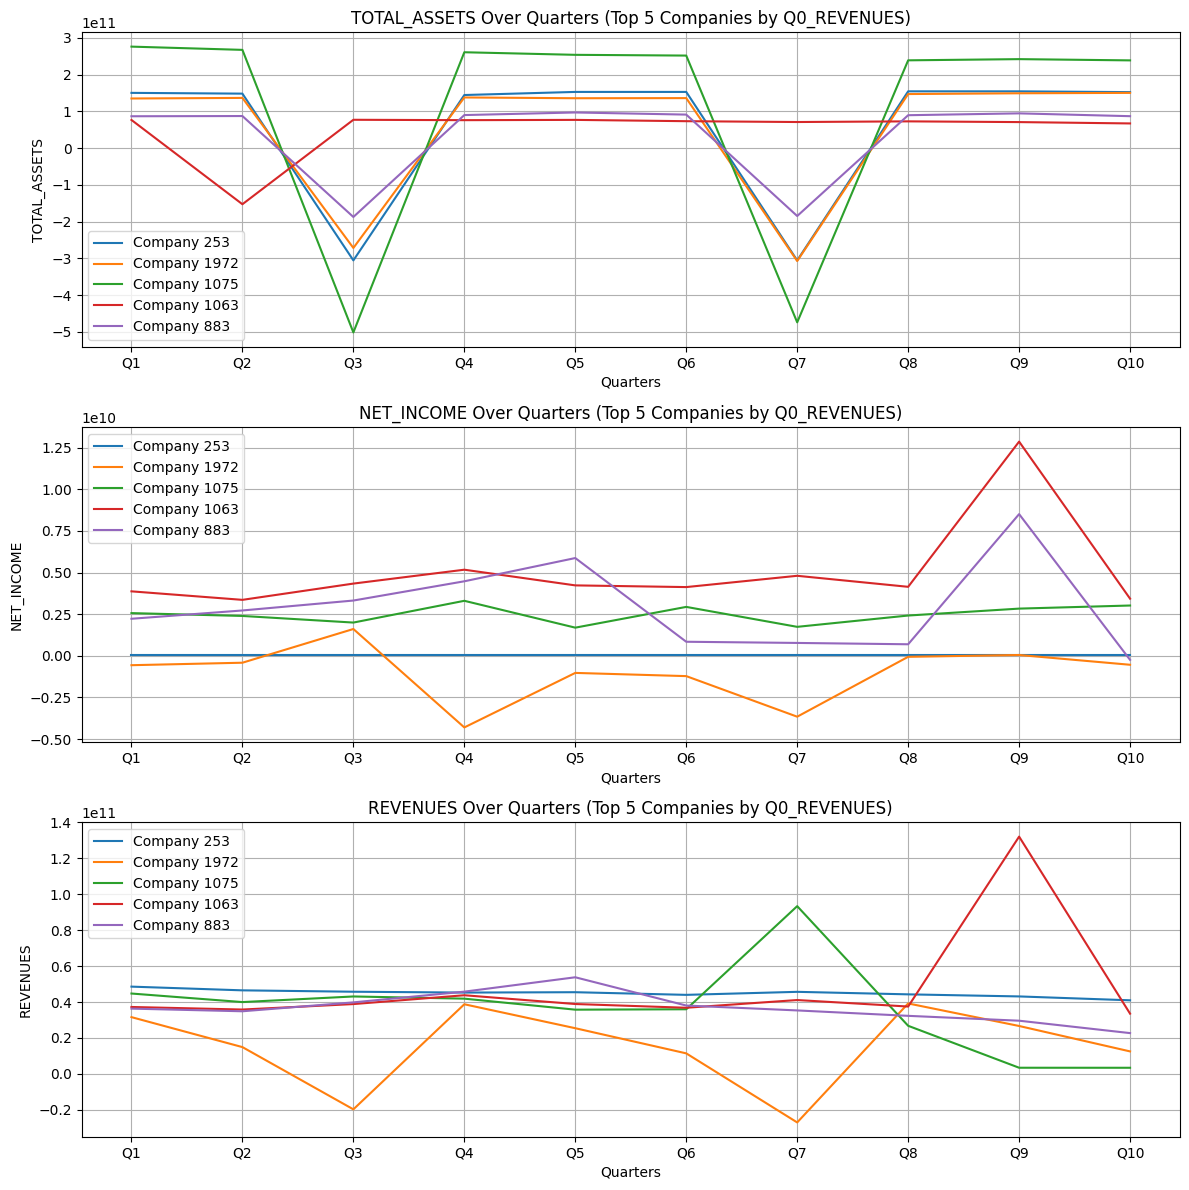

In [26]:
# Define the financial targets
financial_targets = ['TOTAL_ASSETS', 'NET_INCOME', 'REVENUES']
quarters = [f'Q{i}' for i in range(1, 11)]

# Lets analyze some indicators over the top 5 companies,
# sort companies by Q0_REVENUES in descending order and select the top 5 companies
top_companies = cleaned_data.sort_values(by='Q0_REVENUES', ascending=False).head(5)

# Set up the figure for subplots,
# once subplot per target
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Plot the line charts for the top 5 companies
for i, target in enumerate(financial_targets):
    for idx, company in top_companies.iterrows():
        # Select the data for each company across quarters
        column_names = quarter_names(target, show=False)
        ax[i].plot(quarters, company[column_names], label=f'Company {company["Id"]}')
    
    # Set chart title and labels
    ax[i].set_title(f'{target} Over Quarters (Top 5 Companies by Q0_REVENUES)')
    ax[i].set_xlabel('Quarters')
    ax[i].set_ylabel(target)
    ax[i].legend()
    ax[i].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Total Assets trends**

Over this top companies, We can see a downfall on their assets on the quarter 3 and 6 (last and first quarter of 2022) as a common pattern, from there can be generated an investigation according to the industry or sector (or any other relevant topic) of the companies to explain the why of that downfall.

The overall insights againts this 5 top companies, can be concluded in: 

- The company 1972 shows more negative fluctuations than any other in all 3 aspects; suggesting volatility.
- Company 1063 stands out over the other ones, is the only company that avoids the downfall in the total assests throught 2022 and presents higher spikes in revenue and net income.